# Assignment 5
## Data Analysis and Visualization

These assignments are related to visualization with **MathPlotLib** and **Seaborn** libraries.
* [Matplotlib](https://matplotlib.org/)
* [seaborn](https://seaborn.pydata.org/)

In these assignments, you must program some new code to get as an output figure given in assignment.
* Read the related course material before doing the assignments from the
[Topic 5. Visualization](https://ttc8040.pages.labranet.jamk.fi/da_vi_material/lectures/topic5_visualize.nbconvert/).

In [2]:
# Write your information here!
student_name = 'Juuso Leppänen'
student_id = 'AD1885'

## Assignment 05-01. Visualizing Weather Data

Visualize weather data loaded from the [Finnish Meteorological Institute's WFS interface](https://en.ilmatieteenlaitos.fi/download-observations) using a `DataFrame`. Before plotting the data, you need to process it as follows:
* Load the data into a `DataFrame` from the file `'data/saatiedot.csv'`, considering that ',' is the column separator and '.' is the decimal separator.
* The first column (or index) of the data contains the time in the format **year-month-day hours:minutes:seconds**.
* Create a new `DataFrame` column `'time, s'` indicating the amount of time in seconds from the first measurement onwards.
* Add a new column `'Air temperature, degC'` to the `DataFrame`.
* Print the first five rows of your processed `DataFrame`.

After processing the data, create an x-y plot as follows:
* Use the column `'time, s'` on the horizontal axis and the column `'Air temperature, degC'` on the vertical axis.
* Mark data points with red dots.
* Provide a legend for the red dots, labeled as `'Air temperature'`.
* Use `'time, s'` for the x-axis title and `'Air temperature $^{o}C$'` for the y-axis title.
* Use [TeX syntax](https://en.wikipedia.org/wiki/TeX) to denote the physical unit in the y-axis title.
* Add a grid with a _black dashed line_.

**The final result should look like the following image:**

![h5.1](./img/h5_t1.png)

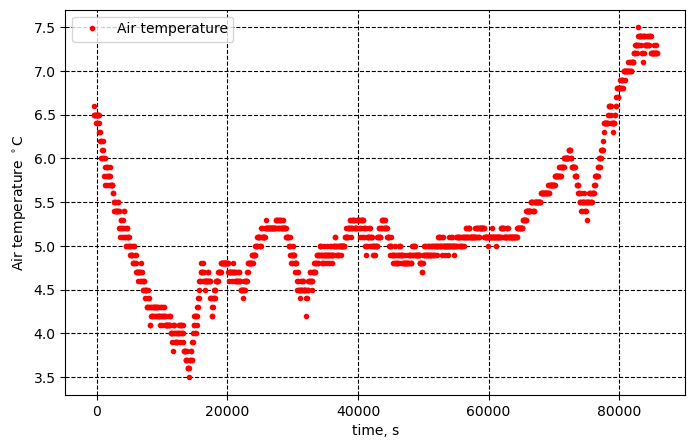

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    "data/saatiedot.csv",
    sep = ",",
    decimal = "."
)

df["time"] = pd.to_datetime(df.iloc[:, 0])
t0 = df["time"].iloc[0]
df["time, s"] = (df["time"] - t0).dt.total_seconds()

temp_col = [c for c in df.columns if "Air" in c and "temp" in c][0]
df["Air temperature, degC"] = df[temp_col]

# print(df.head())

plt.figure(figsize = (8, 5))
plt.plot(
    df["time, s"],
    df["Air temperature, degC"],
    "r.",
    label = "Air temperature"
)

plt.xlabel("time, s")
plt.ylabel(r"Air temperature $^\circ$C")
plt.legend()

plt.grid(True, linestyle = "--", color = "black")

plt.show()

## Assignment 05-02. Premier League Standings

Visualize selected Premier League football teams' home and away wins in the same bar chart. Before plotting the data, you need to process it as follows:
* Load the data into a `DataFrame` from the given url address (`"data/england-premier-league-teams-2018-to-2019-stats.csv"`).
* Add new columns `common_name`, `wins_home` (home wins), and `wins_away` (away wins) to the DataFrame.
* Select the following teams from the DataFrame (`common_name` column): `'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'`
* Shorten the team names for the chart by creating a new column `short_name` with the following names: `'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton'`
* Create a new DataFrame using the `df.melt(id_vars, var_name, value_name ...)` method with new columns `Win Type` and `Wins`
```
   short_name   Win Type  Wins
0     Arsenal  wins_home    14
::::::::::::::::::::::::::::::
7     Arsenal  wins_away     7
```

* After processing the data, create a bar chart on an (x, y)-plane, where the x-axis shows the team's shortened name and the y-axis shows both home wins (`wins_home`) and away wins (`wins_away`).
* Provide a legend for the bars (hint: `Legend`).
* Rotate the x-axis titles by 30 degrees (hint: `xticks`).
* Set a title for the chart.

**The final result should look like the following image:**

![h5.2](./img/h5_t2.png)

  short_name   Win type  Wins
0    Arsenal  home_wins    14
1  Tottenham  home_wins    12
2    ManCity  home_wins    18
3    Everton  home_wins    10
4       ManU  home_wins    10
5  Liverpool  home_wins    17
6    Chelsea  home_wins    12
7    Arsenal  away_wins     7
8  Tottenham  away_wins    11
9    ManCity  away_wins    14


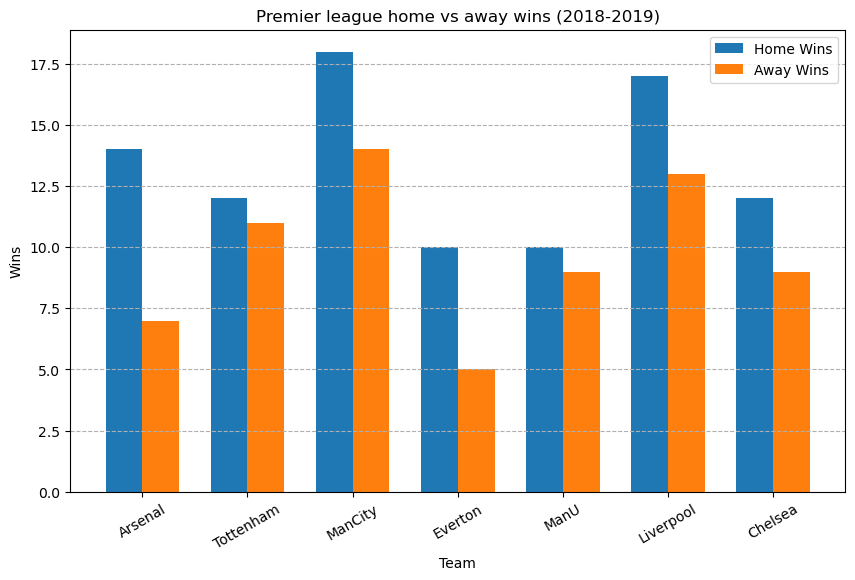

In [6]:
import numpy as np

df = pd.read_csv("data/england-premier-league-teams-2018-to-2019-stats.csv")

df["common_name"] = df["team_name"].str.strip().str.replace(r" FC$", "", regex=True).str.replace(r" AFC$", "", regex=True)
df["home_wins"] = df["wins_home"]
df["away_wins"] = df["wins_away"]

selected = ['Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton']
df = df[df["common_name"].isin(selected)]

short_names = {
    'Arsenal' : 'Arsenal',
    'Tottenham Hotspur' : 'Tottenham',
    'Manchester City' : 'ManCity',
    'Manchester United' : 'ManU',
    'Chelsea' : 'Chelsea',
    'Liverpool' : 'Liverpool',
    'Everton' : 'Everton'
}

df["short_name"] = df["common_name"].map(short_names)

df_melted = df.melt(
    id_vars = "short_name",
    value_vars = ["home_wins", "away_wins"],
    var_name = "Win type",
    value_name = "Wins"
)

print(df_melted.head(10))

plt.figure(figsize = (10, 6))

teams = df["short_name"].tolist()
x = np.arange(len(teams))
width = 0.35

home_wins = df_melted[df_melted["Win type"] == "home_wins"]["Wins"].values
away_wins = df_melted[df_melted["Win type"] == "away_wins"]["Wins"].values

plt.bar(x - width/2, home_wins, width, label = "Home Wins")
plt.bar(x + width/2, away_wins, width, label = "Away Wins")

plt.xticks(x, teams, rotation = 30)

plt.xlabel("Team")
plt.ylabel("Wins")
plt.title("Premier league home vs away wins (2018-2019)")

plt.legend()
plt.grid(axis = "y", linestyle = "--")

plt.show()

## Assignment 05-03. Premier League Standings

Visualize Premier League football data for selected teams, showing both home and away wins in the same bar chart. Before plotting the data, process it as follows:
* Load the data into a `DataFrame` from the file `"data/england-premier-league-teams-2018-to-2019-stats.csv"`.
* Add columns `team_name, common_name, season, wins, draws`, and `losses` to the `DataFrame`.
* Select the following teams (`common_name`): `'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'`
* Shorten the team names for the chart by creating a new column `short_name` with the following names: `'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton'`
* Add a completely new column `points` to the `DataFrame` using the formula: `wins * 3 + draws` (0 points for losses).

After processing the data, create a bar chart on a transposed (x, y)-plane, where the y-axis shows the shortened team name, and the x-axis shows the points collected by the team.
* Try to rotate the y-axis titles by _30_ degrees (hint: `plt.yticks`).
* Add dynamically a title for the y-axis, including information about the season (`season`) and the number of matches played (`matches_played`) from the original `DataFrame`.
* Add a grid to the chart (hint: `grid`).

**The final result should look like the following image:**

![h5.3](./img/h5_t3.png)

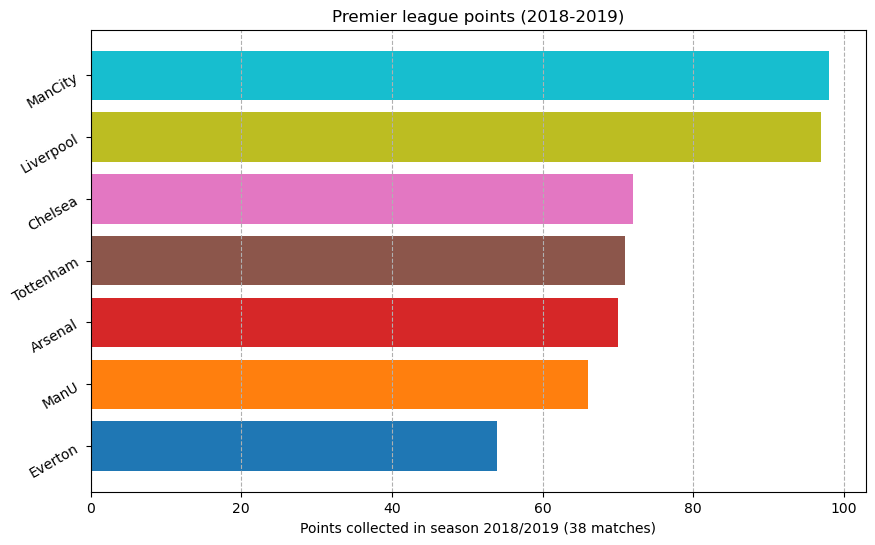

In [21]:
import matplotlib
import matplotlib.cm as cm

df = pd.read_csv("data/england-premier-league-teams-2018-to-2019-stats.csv")

df["common_name"] = df["team_name"].str.strip().str.replace(r" FC$", "", regex=True).str.replace(r" AFC$", "", regex=True)

df["team_name"] = df["team_name"]
df["wins"] = df["wins"]
df["draws"] = df["draws"]
df["losses"] = df["losses"]
df["season"] = df["season"]

selected = ['Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton']
df = df[df["common_name"].isin(selected)]

short_names = {
    'Arsenal' : 'Arsenal',
    'Tottenham Hotspur' : 'Tottenham',
    'Manchester City' : 'ManCity',
    'Manchester United' : 'ManU',
    'Chelsea' : 'Chelsea',
    'Liverpool' : 'Liverpool',
    'Everton' : 'Everton'
}

df["short_name"] = df["common_name"].map(short_names)

df["points"] = df["wins"] * 3 + df["draws"]

plt.figure(figsize = (10, 6))

df_sorted = df.sort_values("points", ascending=True)
num_bars = len(df_sorted)
colors = matplotlib.colormaps['tab10'].resampled(num_bars).colors

plt.barh(df_sorted["short_name"], df_sorted["points"], color = colors)
plt.yticks(rotation = 30)
season = df_sorted["season"].iloc[0]
matches_played = df_sorted["matches_played"].iloc[0]
plt.xlabel(f"Points collected in season {season} ({matches_played} matches)")
plt.title("Premier league points (2018-2019)")
plt.grid(axis = "x", linestyle = "--")
plt.show()

## Assignment 05-04. Visualizing Car Data

Load the data into a `DataFrame` from the file: `data/autot.csv`.
Save only those rows in a new `DataFrame` where the car manufacturer (column `Mh`) has more than 50 cars. In the new `DataFrame`, replace the string `'DIESEL'` in column `Ft` with `'Diesel'` and `'PETROL'` with `'Petrol'`. If the string `'NG'` appears in column `Ft`, replace it with `'Natural gas'`.

The result of the visualization is an image similar to the one below, where you utilize the columns of your `DataFrame` for the car fuel type `Ft` and the car manufacturer `Mh`.

**The final result should look like the following image:**

![h5.4](./img/h5_t4.png)

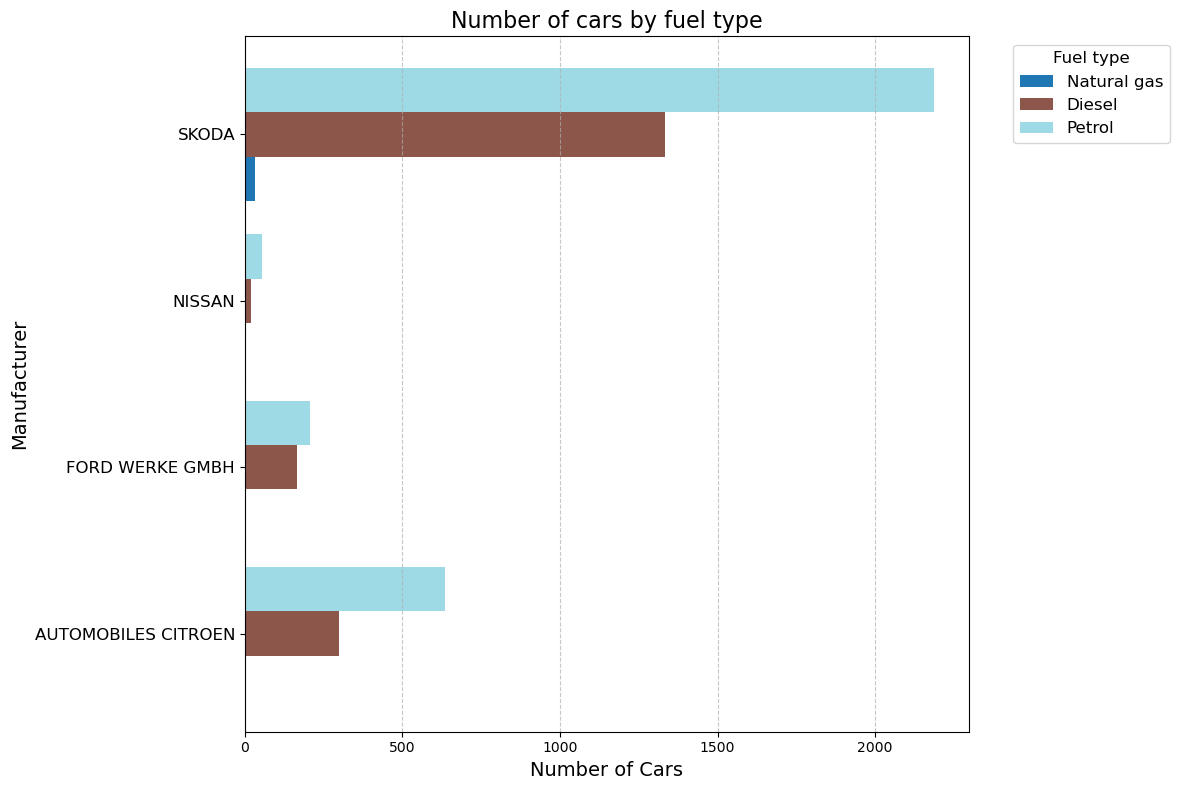

In [44]:
# Load and clean data
df = pd.read_csv("data/autot.csv", sep="\t", on_bad_lines="skip")
df.columns = df.columns.str.strip()

# Filter manufacturers with > 50 cars
manufacturers = df['Mh'].value_counts()
df = df[df['Mh'].isin(manufacturers[manufacturers > 50].index)].copy()

# Clean fuel names
df['Ft'] = df['Ft'].replace({
    'DIESEL': 'Diesel',
    'PETROL': 'Petrol',
    'NG': 'Natural gas'
})

# Ordered fuels
fuel_order = ['Natural gas', 'Diesel', 'Petrol']

# Cross-tabulation with safe column selection
fuel_counts = pd.crosstab(df['Mh'], df['Ft'])
fuel_counts = fuel_counts.reindex(columns=fuel_order, fill_value=0)

# Bar parameters
num_fuels = len(fuel_order)
height = 0.8 / num_fuels
colors = matplotlib.colormaps['tab20'].resampled(num_fuels).colors

# Plot
plt.figure(figsize=(12, 8))
plt.title("Number of cars by fuel type", fontsize=16)

for i, fuel in enumerate(fuel_order):
    plt.barh(
        y + i*height - 0.4 + height/2,
        fuel_counts[fuel],
        height=height,
        color=colors[i],
        label=fuel
    )

plt.yticks(y, fuel_counts.index, fontsize=12)
plt.xlabel("Number of Cars", fontsize=14)
plt.ylabel("Manufacturer", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Fuel type', bbox_to_anchor=(1.05, 1), fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()


## Assignment 05-05. Visualizing Car Data Part 2

Load the same data as in previous assignment into a `DataFrame` from the file: `data/autot.csv`

The result of the visualization is a _histogram_ similar to the one below, showing the distribution of $CO_2$ emissions (column `Enedc (g/km)`) in 100 different bins and a *cumulative histogram* of $CO_2$ emissions

**The final result should look like the following image:**

![h5.5](./img/h5_t5.png)


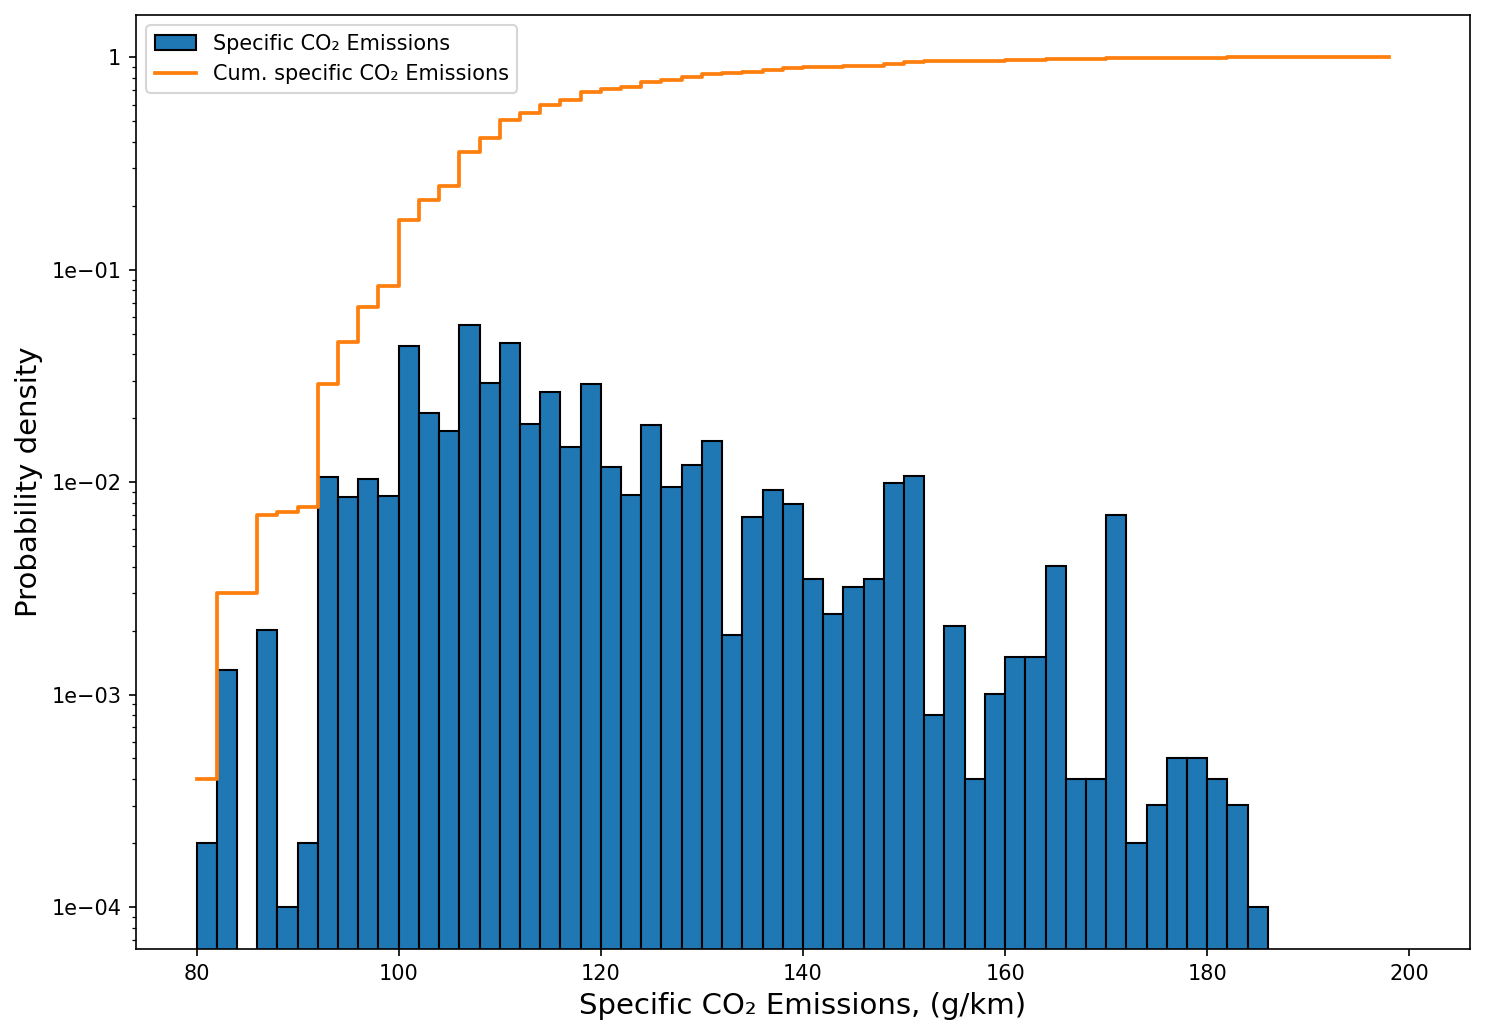

In [46]:
from matplotlib.ticker import LogLocator, LogFormatter

df = pd.read_csv("data/autot.csv", sep="\t", on_bad_lines="skip")
df.columns = df.columns.str.strip()

co2 = df["Enedc (g/km)"].dropna()
co2 = co2[(co2 >= 80) & (co2 <= 200)]

plt.figure(figsize=(10, 7), dpi=150)

# spesific emissions
bins = np.linspace(80, 200, 61)
hist_data, bins, _ = plt.hist(
    co2,
    bins=bins,
    density=True,
    edgecolor="black",
    label="Specific CO₂ Emissions"
)

# cumulative spesific co2 emissions
cdf = np.cumsum(hist_data * np.diff(bins))
plt.step(
    bins[:-1],
    cdf,
    where="post",
    linewidth=1.8,
    label="Cum. specific CO₂ Emissions"
)

# log base
plt.yscale("log")
plt.gca().yaxis.set_major_locator(LogLocator(base=10))
plt.gca().yaxis.set_major_formatter(LogFormatter(base=10))


plt.xlabel("Specific CO₂ Emissions, (g/km)", fontsize=14)
plt.ylabel("Probability density", fontsize=14)

plt.legend()

plt.tight_layout()
plt.show()